In [1]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
import numpy as np

In [2]:
from scipy.spatial.distance import cdist

In [5]:
crime = pd.read_csv("E:/DataScience/Assignments/Clustering/crime_data.csv")

In [6]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [7]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

In [8]:
df_crime = norm_func(crime.iloc[:,1:])
df_crime.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [25]:
cluster = KMeans(n_clusters=4)
cluster.fit(df_crime)
cluster.labels_

array([0, 2, 2, 0, 2, 2, 3, 3, 2, 0, 3, 1, 2, 3, 1, 3, 1, 0, 1, 2, 3, 2,
       1, 0, 2, 1, 1, 2, 1, 3, 2, 2, 0, 1, 3, 3, 3, 3, 3, 0, 1, 0, 2, 3,
       1, 3, 3, 1, 1, 3])

In [26]:
c = list(range(2,8))
c
TWSS = []
for i in c:
    Kmeans = KMeans(n_clusters = i)
    Kmeans.fit(df_crime)
    WSS = []
    for j in range(i):
        WSS.append(sum(cdist(df_crime.iloc[Kmeans.labels_==j,:],Kmeans.cluster_centers_[j].reshape(1,df_crime.shape[1]),"euclidean")))
        TWSS.append(sum(WSS))
        

In [27]:
TWSS

[array([9.71173032]),
 array([16.96661211]),
 array([4.69320087]),
 array([7.67537797]),
 array([14.59566832]),
 array([2.9821771]),
 array([6.45385463]),
 array([10.71431653]),
 array([12.72623173]),
 array([3.47167753]),
 array([5.7684351]),
 array([7.38479901]),
 array([8.9006038]),
 array([11.7370846]),
 array([2.01646412]),
 array([3.91983761]),
 array([6.69576996]),
 array([8.31213387]),
 array([9.8805512]),
 array([11.26973841]),
 array([1.6848119]),
 array([3.70127602]),
 array([5.31763993]),
 array([7.05771161]),
 array([9.98140599]),
 array([10.56344358]),
 array([10.56344358])]

ValueError: x and y must have same first dimension, but have shapes (6,) and (27, 1)

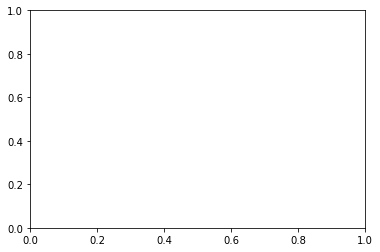

In [28]:
plt.plot(c,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(c)